In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Load The Bank Data

In [450]:
bank = pd.read_csv('../data/bank_full.csv')

In [451]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [452]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


In [453]:
bank.rename(index=str, columns={'default': 'credits', 'contact': 'contact_type', 'y': 'subscription'}, inplace = True)
bank.head()

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


In [454]:
bank['day'] = bank['day'].astype(object)

In [455]:
bank.select_dtypes('object')

,job,marital,education,credits,housing,loan,contact_type,day,month,poutcome,subscription
0,retired,married,secondary,no,no,no,telephone,1,oct,unknown,no
1,retired,divorced,primary,no,no,no,telephone,21,apr,unknown,yes
2,retired,divorced,secondary,no,no,no,cellular,3,mar,unknown,no
3,retired,married,unknown,no,no,no,cellular,4,aug,success,yes
4,retired,married,unknown,no,no,no,cellular,22,jul,success,yes
...,...,...,...,...,...,...,...,...,...,...,...
45206,student,single,secondary,no,no,no,cellular,24,aug,unknown,no
45207,student,single,secondary,no,no,no,cellular,4,nov,other,no
45208,student,single,primary,no,no,no,cellular,13,nov,success,yes
45209,student,single,primary,no,no,no,cellular,12,aug,unknown,yes


## Explore The Data 

### Number Of Missing Values and Duplicates By Column
Count the number of missing values and duplicates in each column and sort them.

In [456]:
missing = pd.concat([bank.isnull().sum(), 100*bank.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
age,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
day,0,0.0
poutcome,0,0.0
contact_type,0,0.0
housing,0,0.0


In [457]:
duplicate = bank[bank.duplicated()]
duplicate 

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription


### Categorical Features

In [458]:
bank.describe(include = ['object', 'bool']).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
credits,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact_type,45211,3,cellular,29285
day,45211,31,20,2752
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


People who have credits are less than 5%, so we can delete the column of credits

In [459]:
bank = bank.drop('credits', axis = 1)

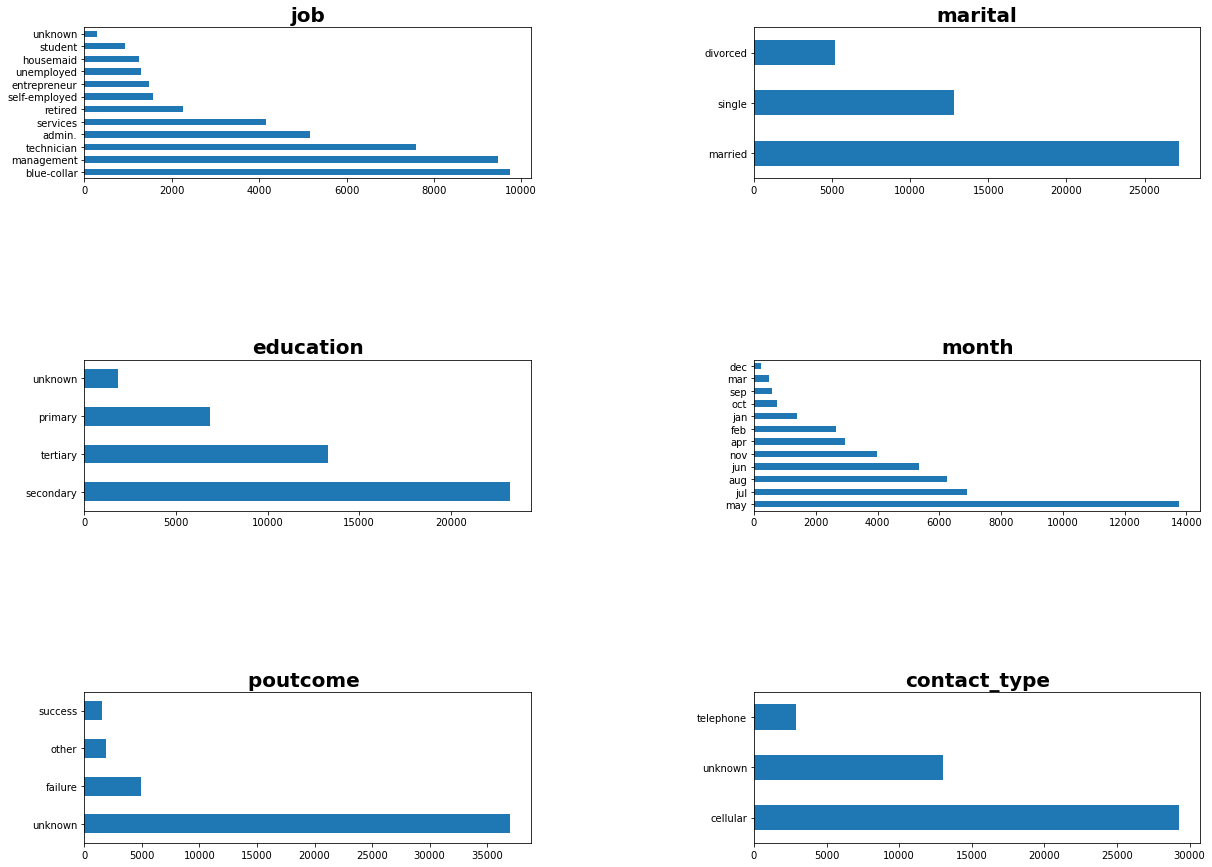

In [460]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
bank.job.value_counts().plot(kind='barh', ax=ax[0,0])
ax[0,0].set_title('job', fontweight="bold", size=20)

bank.marital.value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('marital', fontweight="bold", size=20)

bank.education.value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('education', fontweight="bold", size=20)

bank.month.value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('month', fontweight="bold", size=20)

bank.poutcome.value_counts().plot(kind='barh', ax=ax[2,0])
ax[2,0].set_title('poutcome ', fontweight="bold", size=20)

bank.contact_type.value_counts().plot(kind='barh', ax=ax[2,1])
ax[2,1].set_title('contact_type', fontweight="bold", size=20)

plt.subplots_adjust(wspace=0.5,hspace=1.2);

In [461]:
bank['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [462]:
bank['contact_type'].value_counts()


cellular     29285
unknown      13020
telephone     2906
Name: contact_type, dtype: int64

Half of the contact type is cellular and one third of the other data is unknown. It's not meaningful to keep this column.

In [463]:
bank = bank.drop('contact_type', axis = 1)

In [464]:
bank.select_dtypes('object')

,job,marital,education,housing,loan,day,month,poutcome,subscription
0,retired,married,secondary,no,no,1,oct,unknown,no
1,retired,divorced,primary,no,no,21,apr,unknown,yes
2,retired,divorced,secondary,no,no,3,mar,unknown,no
3,retired,married,unknown,no,no,4,aug,success,yes
4,retired,married,unknown,no,no,22,jul,success,yes
...,...,...,...,...,...,...,...,...,...
45206,student,single,secondary,no,no,24,aug,unknown,no
45207,student,single,secondary,no,no,4,nov,other,no
45208,student,single,primary,no,no,13,nov,success,yes
45209,student,single,primary,no,no,12,aug,unknown,yes


### Numeric Features

In [465]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


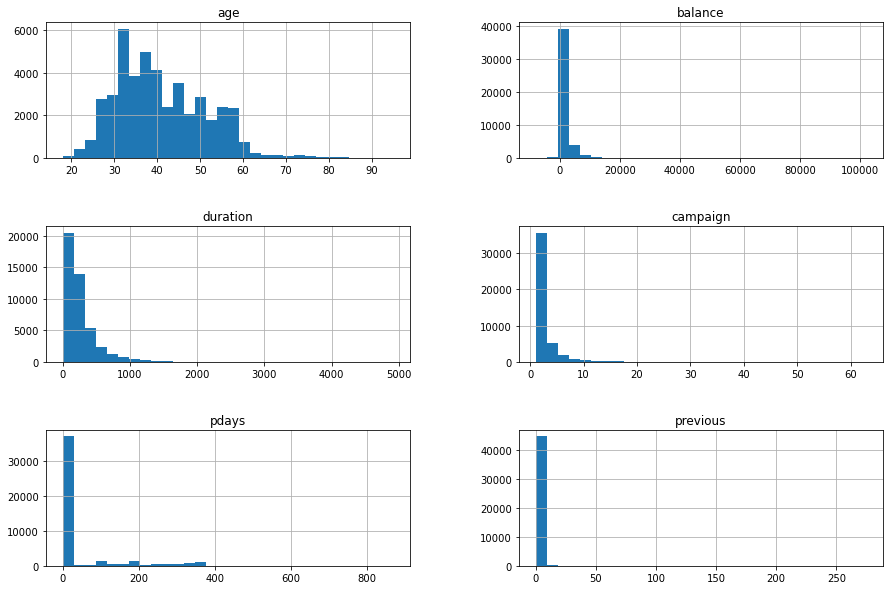

In [466]:
bank.hist(bins = 30, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Feature / Variable Creation

In [467]:
bank['month_num'] = bank['month'].apply(lambda x: datetime.strptime(x, '%b').month)
bank['month_num'] = bank['month_num'].astype(object)
bank['month_num'].value_counts()



5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: month_num, dtype: int64

In [468]:
bank['loan'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
bank['housing'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
bank['subscription'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
bank['poutcome'].replace(['success', 'failure','unknown','other'],
                        [1, 0, 2, 3], inplace=True)

#### Outliers

In [469]:
bank.loc[bank.previous > 50]

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription,month_num
14260,46,blue-collar,married,primary,1085,1,1,15,may,523,2,353,58,3,1,5
21075,40,management,married,tertiary,543,1,0,2,feb,349,2,262,275,3,0,2
25041,37,technician,married,secondary,432,1,0,6,jul,386,3,776,55,0,1,7
37067,31,management,single,tertiary,358,1,0,30,jan,68,3,256,51,0,0,1


One person (21075) has an incredibly high previous contact numbers. The data looks very suspicious, so we delete this one row. 

In [472]:
bank = bank[bank.previous < 60]

In [471]:
bank.loc[bank.poutcome == 3]

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription,month_num
11,89,retired,divorced,primary,1323,0,0,29,dec,207,4,189,1,3,0,12
19,86,retired,married,secondary,1503,0,0,18,mar,165,3,101,1,3,0,3
33,84,retired,married,secondary,81204,0,0,28,dec,679,1,313,2,3,1,12
39,84,retired,divorced,primary,1680,0,0,6,sep,113,5,97,3,3,0,9
61,83,housemaid,married,primary,2140,0,0,6,sep,109,3,276,8,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45152,20,student,single,primary,134,0,0,12,jul,273,1,277,3,3,0,7
45176,19,student,single,secondary,55,0,0,6,oct,89,2,193,1,3,0,10
45180,19,student,single,secondary,424,0,0,30,jun,121,3,195,2,3,0,6
45192,19,student,single,primary,245,0,0,10,nov,98,2,110,2,3,0,11


poutcome 'other' means those clients have been contacted before but not sure the success. Meanwhile,'Unknown' means the clients has not been contacted before this campaign. 

In [431]:
bank[['poutcome','subscription']].value_counts().sort_index()

poutcome  subscription
0         0                4283
          1                 618
1         0                 533
          1                 978
2         0               33573
          1                3386
3         0                1532
          1                 307
dtype: int64

One thing can be confusing is that while poutcome is 1 (success), now the subscription is 0. It could be that they closed their term deposit between last campaign and this campaign. Poutcome 3 orginially is marked as 'Other'. 

It looks like the campaign reaches everyone in the dataset, regardless of their poutcome. 

In [433]:
bank[['poutcome', 'subscription','previous','pdays',]].value_counts()

poutcome  subscription  previous  pdays
2         0             0         -1       33570
          1             0         -1        3384
0         0             1          370        41
                                   364        25
                                   350        25
                                           ...  
          1             3          97          1
                                   99          1
                                   102         1
                                   105         1
3         1             58         353         1
Length: 4231, dtype: int64

pdays = -1 associates with previous = 0. This shows that those people associated with the data have not been contacted before. During this compaign, 3384 people responded yes to the term deposit while 33570 people refused.

pdays = -1 can be confusing. Therefore, I replace it with a very big number (2613), which is 3 times the max pdays (871 days)

In [435]:
pbank= bank[bank.pdays != -1]
pbank.shape

(8256, 16)

In [436]:
nbank = bank[bank.pdays == -1]
nbank.shape

(36954, 16)

<AxesSubplot:>

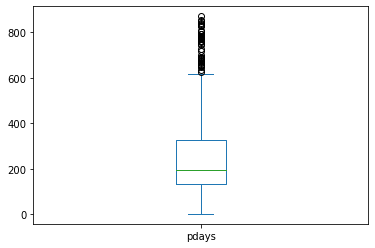

In [437]:
pbank.pdays.plot(kind='box')

In [474]:
bank.loc[bank.pdays == -1]
bank['pdays'].replace([-1],
                        [2613], inplace=True)

In [475]:
pbank['poutcome'].value_counts()

0    6745
1    1511
Name: poutcome, dtype: int64

In [477]:
pbank['poutcome'].replace([2, 3],
                        [0,0], inplace=True)

In [478]:
pbank['poutcome'].value_counts()

0    6745
1    1511
Name: poutcome, dtype: int64

<AxesSubplot:>

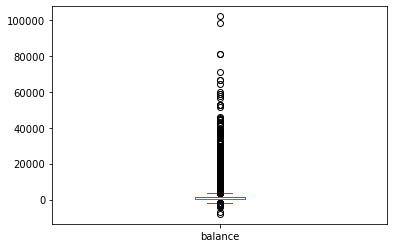

In [443]:
bank.balance.plot(kind='box')

In [479]:

iqr = 1.5 * (np.percentile(bank['balance'], 75) - np.percentile(bank['balance'], 25))
balance_outlier1 = bank[bank['balance'] > (iqr + np.percentile(bank['balance'], 75))]
balance_outlier2 = bank[bank['balance'] < (np.percentile(bank['balance'], 25) - iqr)]

print(balance_outlier1.shape, balance_outlier2.shape)




(4712, 16) (17, 16)


<AxesSubplot:>

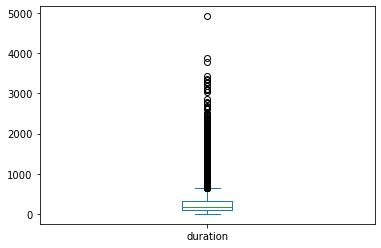

In [480]:
bank.duration.plot(kind='box')

In [481]:
iqr = 1.5 * (np.percentile(bank['duration'], 75) - np.percentile(bank['duration'], 25))
duration_outlier1 = bank[bank['duration'] > (iqr + np.percentile(bank['duration'], 75))]
duration_outlier2 = bank[bank['duration'] < (np.percentile(bank['duration'], 25) - iqr)]

print(duration_outlier1.shape, duration_outlier2.shape)

(3235, 16) (0, 16)


In [482]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45210 non-null  int64 
 1   job           45210 non-null  object
 2   marital       45210 non-null  object
 3   education     45210 non-null  object
 4   balance       45210 non-null  int64 
 5   housing       45210 non-null  int64 
 6   loan          45210 non-null  int64 
 7   day           45210 non-null  object
 8   month         45210 non-null  object
 9   duration      45210 non-null  int64 
 10  campaign      45210 non-null  int64 
 11  pdays         45210 non-null  int64 
 12  previous      45210 non-null  int64 
 13  poutcome      45210 non-null  int64 
 14  subscription  45210 non-null  int64 
 15  month_num     45210 non-null  object
dtypes: int64(10), object(6)
memory usage: 5.9+ MB


#### Save

In [483]:
bank_cleaned = bank.copy()
pbank_cleaned = pbank.copy()
nbank.to_csv('nbank.csv')
bank_cleaned.to_csv('bank_cleaned.csv')
pbank_cleaned.to_csv('pbank_cleaned.csv')